In [1]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [4]:
def helper(col):
    print(df[col].unique())
    print("Total null = " ,df[col].isnull().sum())
    print("count= ",df[col].count())

In [5]:
helper('SEVERITYCODE')

[2 1]
Total null =  0
count=  194673


##### Severity code is the target here

In [6]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [7]:
df.dropna(subset=['UNDERINFL','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE'],inplace=True)

In [8]:
df.shape

(183177, 38)

In [9]:
df['SPEEDING'].fillna("N",inplace=True)
df['INATTENTIONIND'].fillna("N",inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183177 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      183177 non-null int64
X                 180067 non-null float64
Y                 180067 non-null float64
OBJECTID          183177 non-null int64
INCKEY            183177 non-null int64
COLDETKEY         183177 non-null int64
REPORTNO          183177 non-null object
STATUS            183177 non-null object
ADDRTYPE          182895 non-null object
INTKEY            63298 non-null float64
LOCATION          182660 non-null object
EXCEPTRSNCODE     75690 non-null object
EXCEPTRSNDESC     2110 non-null object
SEVERITYCODE.1    183177 non-null int64
SEVERITYDESC      183177 non-null object
COLLISIONTYPE     183177 non-null object
PERSONCOUNT       183177 non-null int64
PEDCOUNT          183177 non-null int64
PEDCYLCOUNT       183177 non-null int64
VEHCOUNT          183177 non-null int64
INCDATE           183177 non-null object
INCDTTM           183177 non-null obje

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEVERITYCODE,183177.0,1.309296e+00,4.622049e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
X,180067.0,-1.223305e+02,2.997735e-02,-1.224191e+02,-1.223486e+02,-1.223302e+02,-1.223119e+02,-1.222389e+02
Y,180067.0,4.761950e+01,5.633115e-02,4.749557e+01,4.757558e+01,4.761528e+01,4.766394e+01,4.773414e+01
OBJECTID,183177.0,1.059971e+05,6.260997e+04,1.000000e+00,5.175400e+04,1.022430e+05,1.596390e+05,2.195470e+05
INCKEY,183177.0,1.375858e+05,8.592287e+04,1.001000e+03,6.765700e+04,1.185010e+05,1.983990e+05,3.313420e+05
COLDETKEY,183177.0,1.377816e+05,8.626350e+04,1.001000e+03,6.765700e+04,1.185010e+05,1.985390e+05,3.328420e+05
INTKEY,63298.0,3.749370e+04,5.131956e+04,2.380700e+04,2.866600e+04,2.997300e+04,3.398400e+04,7.575800e+05
SEVERITYCODE.1,183177.0,1.309296e+00,4.622049e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
PERSONCOUNT,183177.0,2.475693e+00,1.370376e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.100000e+01
PEDCOUNT,183177.0,3.894594e-02,2.028340e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


In [12]:
subset=['UNDERINFL','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','SPEEDING']
for i in subset:
    print(df[i].value_counts())
    print("\n")

N    95132
0    79043
Y     5024
1     3978
Name: UNDERINFL, dtype: int64


Mid-Block (not related to intersection)              86852
At Intersection (intersection related)               61226
Mid-Block (but intersection related)                 22353
Driveway Junction                                    10520
At Intersection (but not related to intersection)     2057
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64


Clear                       109157
Raining                      32671
Overcast                     27202
Unknown                      11767
Snowing                        882
Other                          749
Fog/Smog/Smoke                 558
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


Dry               122260
Wet                46748
Unknown    

In [13]:
X= df[subset]
X.head()

,UNDERINFL,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,SPEEDING
0,N,At Intersection (intersection related),Overcast,Wet,Daylight,Angles,N
1,0,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,Sideswipe,N
2,0,Mid-Block (not related to intersection),Overcast,Dry,Daylight,Parked Car,N
3,N,Mid-Block (not related to intersection),Clear,Dry,Daylight,Other,N
4,0,At Intersection (intersection related),Raining,Wet,Daylight,Angles,N


In [14]:
X['UNDERINFL'].replace('N','0',inplace=True)
helper('UNDERINFL')
X['UNDERINFL'].replace('Y','1',inplace=True)
helper('UNDERINFL')
X['SPEEDING'].replace('N','0',inplace=True)
helper('SPEEDING')
X['SPEEDING'].replace('Y','1',inplace=True)
helper('SPEEDING')



/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


['N' '0' '1' 'Y']
Total null =  0
count=  183177
['N' '0' '1' 'Y']
Total null =  0
count=  183177
['N' 'Y']
Total null =  0
count=  183177
['N' 'Y']
Total null =  0
count=  183177


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183177 entries, 0 to 194672
Data columns (total 7 columns):
UNDERINFL        183177 non-null object
JUNCTIONTYPE     183177 non-null object
WEATHER          183177 non-null object
ROADCOND         183177 non-null object
LIGHTCOND        183177 non-null object
COLLISIONTYPE    183177 non-null object
SPEEDING         183177 non-null object
dtypes: object(7)
memory usage: 11.2+ MB


In [16]:
X['SPEEDING']= X['SPEEDING'].astype(int)
X['UNDERINFL']= X['UNDERINFL'].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183177 entries, 0 to 194672
Data columns (total 7 columns):
UNDERINFL        183177 non-null int64
JUNCTIONTYPE     183177 non-null object
WEATHER          183177 non-null object
ROADCOND         183177 non-null object
LIGHTCOND        183177 non-null object
COLLISIONTYPE    183177 non-null object
SPEEDING         183177 non-null int64
dtypes: int64(2), object(5)
memory usage: 11.2+ MB


## Finding Data Correlation

In [18]:
df_corr= X.corr(method='pearson')

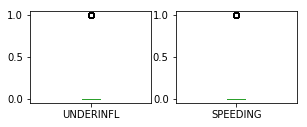

In [19]:
X.plot(kind='box',subplots=True,layout=(10,4),sharex=False,sharey=False,figsize=(10,20))
plt.show()

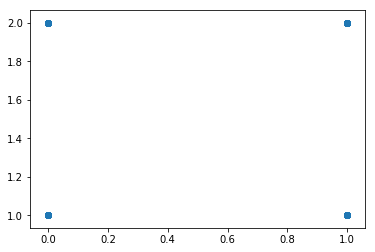

In [20]:
plt.scatter(X['UNDERINFL'], df['SEVERITYCODE'])
plt.show()              

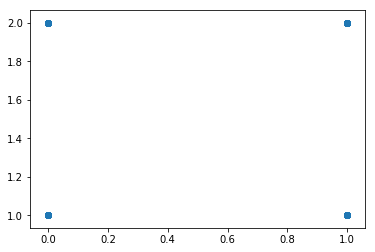

In [21]:
plt.scatter(X['SPEEDING'], df['SEVERITYCODE'] )
plt.show()

## One code encoding for the categorical data

In [22]:
jtype= pd.get_dummies(X['JUNCTIONTYPE'], prefix= 'JUNCTIONTYPE')
road= pd.get_dummies(X['ROADCOND'], prefix= 'ROADCOND')
weather= pd.get_dummies(X['WEATHER'], prefix= 'WEATHER')
light= pd.get_dummies(X['LIGHTCOND'], prefix= 'LIGHTCOND')
collision= pd.get_dummies(X['COLLISIONTYPE'], prefix= 'COLLISIONTYPE')

In [23]:
collision.head()

,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [24]:
X.drop(['JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE'], axis=1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183177 entries, 0 to 194672
Data columns (total 2 columns):
UNDERINFL    183177 non-null int64
SPEEDING     183177 non-null int64
dtypes: int64(2)
memory usage: 4.2 MB


In [26]:
X= pd.concat([X,jtype,road,weather,light,collision],axis=1)

In [27]:
X.head()

,UNDERINFL,SPEEDING,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ROADCOND_Dry,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
X.describe()

,UNDERINFL,SPEEDING,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ROADCOND_Dry,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
count,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,...,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000
mean,0.049144,0.050274,0.011230,0.334245,0.057431,0.122030,0.474142,0.000884,0.000038,0.667442,...,0.188146,0.029289,0.010897,0.074469,0.125556,0.236231,0.035567,0.183882,0.015995,0.099969
std,0.216169,0.218510,0.105373,0.471727,0.232665,0.327321,0.499332,0.029726,0.006182,0.471131,...,0.390830,0.168615,0.103817,0.262533,0.331349,0.424767,0.185208,0.387389,0.125458,0.299959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Selecting the target

In [29]:
y= df['SEVERITYCODE']
y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [30]:
y.value_counts()

1    126521
2     56656
Name: SEVERITYCODE, dtype: int64

In [31]:
pre_df_maj= y[y==1]

In [32]:
pre_df_min= y[y==2]

In [33]:
from sklearn.utils import resample

In [34]:
maj_sample= resample(pre_df_maj, replace=False, n_samples=10000, random_state=9)

In [35]:
min_sample= resample(pre_df_min, replace=False, n_samples=10000, random_state=9)

In [36]:
y= pd.concat([maj_sample, min_sample])

In [37]:
y.value_counts()

2    10000
1    10000
Name: SEVERITYCODE, dtype: int64

In [38]:
  X= resample(X, replace=False, n_samples=20000, random_state=9)
    

In [39]:
X.head()

,UNDERINFL,SPEEDING,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ROADCOND_Dry,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
95344,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
186141,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57630,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
160982,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
101474,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Train-Test Split

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=9)

In [41]:
print("The shape of train set= ",X_train.shape, y_train.shape)

The shape of train set=  (14000, 48) (14000,)


In [42]:
print("The shape of test set= ", X_test.shape, y_test.shape)

The shape of test set=  (6000, 48) (6000,)


## Classification using various classification algorithm

In [43]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


In [44]:
jaccard_score= []
f1_scores= []


### K-Means Algorithm

In [45]:
from sklearn.neighbors import KNeighborsClassifier 

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
bestScore= 0.0
accuracy_list= []

for k in range(3,20):
    knn_model= KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=10)
    score= scores.mean()
    accuracy_list.append(score)
    
    if score > bestScore:
        bestScore= score
        best_clf= knn_model
        bestK= k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
knn_model=best_clf

Best K is : 4 | Cross validation Accuracy : 0.49964336665477893


In [48]:
knn_model= best_clf

In [49]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [50]:
prediction= knn_model.predict(X_test)

In [51]:
jaccard_score_knn= jaccard_similarity_score(y_test, prediction)
f1_score_knn= f1_score(y_test, prediction, average='weighted')


In [52]:
print(jaccard_score_knn, f1_score_knn)

0.49666666666666665 0.4845200006056202


In [53]:
jaccard_score.append(jaccard_score_knn)
f1_scores.append(f1_score_knn)

### Support Vector Machine

In [54]:
from sklearn import svm

In [55]:
clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train, y_train)  

prediction= clf_svm.predict(X_test)

In [56]:
jaccard_score_svm= jaccard_similarity_score(y_test, prediction)
f1_score_svm= f1_score(y_test, prediction)
print(jaccard_score_svm, f1_score_svm)

0.49383333333333335 0.5474593950230964


In [57]:
jaccard_score.append(jaccard_score_svm)
f1_scores.append(f1_score_svm)

### Decision Tree

In [58]:
from sklearn import tree


In [59]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

prediction= clf_tree.predict(X_test)

In [60]:
jaccard_score_tree= jaccard_similarity_score(y_test, prediction)
jaccard_score.append(jaccard_score_tree)
print(jaccard_score_tree)

0.49233333333333335


In [61]:
f1_score_tree= f1_score(y_test, prediction,average='weighted')
f1_scores.append(f1_score_tree)
print(f1_score_tree)

0.49229226796962444


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_rf = RandomForestClassifier(max_depth=15, random_state=0,n_estimators=100,max_features=20)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
prediction= clf_rf.predict(X_test)

In [64]:
jaccard_score_rf= jaccard_similarity_score(y_test, prediction)
f1_score_rf= f1_score(y_test, prediction)

In [65]:
print(jaccard_score_rf)

0.49666666666666665


In [66]:
jaccard_score.append(jaccard_score_rf)

In [67]:
print(jaccard_score)

[0.49666666666666665, 0.49383333333333335, 0.49233333333333335, 0.49666666666666665]


In [68]:
f1_scores.append(f1_score_rf)
print(f1_scores)

[0.4845200006056202, 0.5474593950230964, 0.49229226796962444, 0.4980053191489362]


In [69]:
score_jacc_dict= dict(enumerate(jaccard_score))
score_jacc_dict

{0: 0.49666666666666665,
 1: 0.49383333333333335,
 2: 0.49233333333333335,
 3: 0.49666666666666665}

In [70]:
score_f1_dict= dict(enumerate(f1_scores))
score_f1_dict

{0: 0.4845200006056202,
 1: 0.5474593950230964,
 2: 0.49229226796962444,
 3: 0.4980053191489362}

In [71]:
score_jacc_df= pd.DataFrame(score_jacc_dict.items(), columns=['I','Jaccard-Score'])

In [72]:
score_jacc_df

,I,Jaccard-Score
0,0,0.496667
1,1,0.493833
2,2,0.492333
3,3,0.496667


In [73]:
score_jacc_df.drop('I', axis=1, inplace=True)
score_jacc_df

,Jaccard-Score
0,0.496667
1,0.493833
2,0.492333
3,0.496667


In [74]:
score_f1_df= pd.DataFrame(score_f1_dict.items(), columns=['I', 'F1-Score'])
score_f1_df.drop('I', axis=1, inplace=True)
score_f1_df

,F1-Score
0,0.484520
1,0.547459
2,0.492292
3,0.498005


In [75]:
scores_df= pd.concat([score_jacc_df, score_f1_df], axis=1)

In [76]:
scores_df

,Jaccard-Score,F1-Score
0,0.496667,0.484520
1,0.493833,0.547459
2,0.492333,0.492292
3,0.496667,0.498005


In [77]:
scores_df.rename(index={0:'KNN', 1:'SVM', 2:'Decision-Tree', 3:'Random Forest'})

,Jaccard-Score,F1-Score
KNN,0.496667,0.484520
SVM,0.493833,0.547459
Decision-Tree,0.492333,0.492292
Random Forest,0.496667,0.498005


## From the scores dataframe above I  infer  Random Forest would be a better algorithm